In [387]:
# Get the data for expeirment
import pandas as pd 
import numpy as np

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import Data_utils

from sklearn.inspection import PartialDependenceDisplay
from scikeras.wrappers import KerasRegressor

import TsModel

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.spatial.distance import cdist

In [295]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [296]:
def build_neural_network_model():
    model = models.Sequential()
    #model.add(tf.keras.Input(shape=(2,)))
    model.add(layers.Dense(30, activation=tf.keras.activations.tanh))    
    model.add(layers.Dense(1, activation=tf.keras.activations.relu))    #relu_wrapper 
    return model

In [297]:
# Modified from source: https://adriangb.com/scikeras/refs/heads/master/notebooks/Basic_Usage.html#
def plot_partial_dependence_plot_for_data(x, y, title, model_type):
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if model_type == 'nn':
        title = title + ' for neural network'
        # Neural network
        model = KerasRegressor(build_neural_network_model, loss='mse', metrics=[KerasRegressor.r_squared])
        model.fit(x,y, epochs=50)
    if model_type == 'linear':
        # Linear
        title = title + ' for linear model'
        model = LinearRegression().fit(x, y)
    if model_type == 'ts':
        # TS model
        title = title + ' TS-model'
        model = TsModel.TsModel()
        model.fit(x,y)
        model._estimator_type = "regressor"
        model.dummy_ = "dummy"
        
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.set_title(title)
    features=[0, 1, (0,1)]
    # The dataset has ~480,000 data points, making the PDP prediction grid using the entire dataset makes the 
    # computation too large ~25m, therefore have to subsample here     
    PartialDependenceDisplay.from_estimator(model, x, features, ax=ax) 

In [388]:
#test_data = pd.read_csv('Data\processed_ab_no_precp_test.txt')
test_x = pd.read_csv('Data/exp/1113_multi_target_no_season/multi_6x_test.csv', index_col=0)
test_y = pd.read_csv('Data/exp/1113_multi_target_no_season/multi_6y_test.csv', index_col=0)

#test_data = pd.read_csv('Data/processed_ab_no_precp_with_season_test.csv')

In [314]:
test_x

0       1     2     3     4           5      6       7     8  \
0       52.07 -111.45  29.7  27.0  19.0  143.259219  53.31 -113.58  28.7   
1       52.07 -111.45  27.5  36.0   6.0  143.259219  53.31 -113.58  27.1   
2       52.07 -111.45  14.7  31.0   4.0  143.259219  53.31 -113.58   9.4   
3       52.07 -111.45  24.8   7.0  17.0  143.259219  53.31 -113.58  21.9   
4       52.07 -111.45  26.1   5.0  24.0  143.259219  53.31 -113.58  24.5   
...       ...     ...   ...   ...   ...         ...    ...     ...   ...   
228995  52.42 -114.91  14.9   5.0   8.0  143.796354  51.45 -112.68  19.4   
228996  52.42 -114.91  10.0  34.0   8.0  143.796354  51.45 -112.68  15.4   
228997  52.42 -114.91   4.9  30.0   3.0  143.796354  51.45 -112.68  13.3   
228998  52.42 -114.91  19.1  17.0   5.0  143.796354  51.45 -112.68  21.6   
228999  52.42 -114.91   5.4   8.0   2.0  143.796354  51.45 -112.68  11.1   

           9  ...    26    27    28          29     30      31    32    33  \
0       26.0  ...  27.5  27.0  17.0  102.434947  52.45 -113.76  28.0  31.0   
1       27.0  ...  26.7  15.0   7.0  102.434947  52.45 -113.76  26.8  13.0   
2       26.0  ...  14.8   1.0   7.0  102.434947  52.45 -113.76  12.9   8.0   
3        6.0  ...  21.0  10.0   9.0  102.434947  52.45 -113.76  22.5   7.0   
4       12.0  ...  23.3   6.0  11.0  102.434947  52.45 -113.76  24.7  10.0   
...      ...  ...   ...   ...   ...         ...    ...     ...   ...   ...   
228995   2.0  ...  18.5   8.0   1.0  189.232930  51.03 -113.28  17.5   6.0   
228996  31.0  ...  13.2  34.0   9.0  189.232930  51.03 -113.28  13.9  11.0   
228997  34.0  ...  12.6  36.0   7.0  189.232930  51.03 -113.28  12.2   3.0   
228998  31.0  ...  21.5  11.0  16.0  189.232930  51.03 -113.28  19.4   4.0   
228999  33.0  ...   9.4  24.0   7.0  189.232930  51.03 -113.28  12.3  10.0   

          34          35  
0       17.0   92.122831  
1       13.0   92.122831  
2        4.0   92.122831  
3       11.0   92.122831  
4       17.0   92.122831  
...      ...         ...  
228995   9.0  159.958533  
228996   9.0  159.958533  
228997  15.0  159.958533  
228998  11.0  159.958533  
228999  10.0  159.958533  

[229000 rows x 36 columns]

In [391]:
# gp_x = np.array(test_x['3'][0:100]).reshape(-1, 1)
# gp_y = np.array(test_y['0'][0:100])

# gp_x_test = np.array(test_x['3'][100:200]).reshape(-1, 1)
# gp_y_test = np.array(test_y['0'][100:200])

seed = 123
gp_x, gp_x_test, gp_y, gp_y_test = train_test_split(np.array(test_x), np.array(test_y['0']).reshape(-1, 1)
                                                    , test_size=0.01, random_state=seed)

_, gp_x, _, gp_y = train_test_split(gp_x, gp_y, test_size=0.01, random_state=seed)

# gp_x = np.array(test_x)
# gp_y = np.array(test_y['0']).reshape(-1, 1)

# gp_x_test = np.array(test_x[227000:228000])
# gp_y_test = np.array(test_y['0'][227000:228000]).reshape(-1, 1)

In [392]:
feature_scaler = StandardScaler()
gp_x = feature_scaler.fit_transform(gp_x)
gp_x_test = feature_scaler.transform(gp_x_test)

target_scaler = StandardScaler()  
gp_y = target_scaler.fit_transform(gp_y)
gp_y_test = target_scaler.transform(gp_y_test)

In [393]:
# Modified from source: Dr.E Dr.Cui's private code 

# Kernel function, RBF + constant
# a is 2*sigma_f^2 as a single hyperparameter
def rbf_kernel(x1, x2, length_scale, a, c=1):
    """RBF kernel computation."""
    dist_sq = cdist(x1, x2)**2
    return a * np.exp(-dist_sq / (2 * length_scale**2)) + c

# log-likelihood estimation
def neg_log_likelihood(params, train_x, train_y, noise):
    """Compute the negative log likelihood for Gaussian process."""
    ls, a, c = params
    K = rbf_kernel(train_x, train_x, ls, a, c=c) + noise**2 * np.eye(len(train_x))
    try:
        L = np.linalg.cholesky(K)
        log_det = 2 * np.sum(np.log(np.diagonal(L)))
        inv_y = np.linalg.solve(L.T, np.linalg.solve(L, train_y))
        return 0.5 * np.dot(train_y.reshape(-1, train_y.shape[0])[0], inv_y.reshape(-1, train_y.shape[0])[0]) + 0.5 * log_det + 0.5 * len(train_x) * np.log(2 * np.pi)
    except np.linalg.LinAlgError:
        # In case the kernel matrix is not positive definite
        return np.inf

# A small number to ensure non-sparse matrix is invertible
alpha = 1e-10

# Initial hyperparameters
initial_ls = 1
initial_a = 1
initial_c = 1

# Optimization
result = minimize(neg_log_likelihood, [initial_ls, initial_a, initial_c], args=(gp_x, gp_y, 0.0), 
                  method='L-BFGS-B', bounds=[(1e-5, None), (1e-5, None), (1e-5, None)])


# Optimized hyperparameters
optimized_ls, optimized_a, optimized_c = result.x
#optimized_ls, optimized_a, optimized_c = 1, 1, 10
print(result.x)

# specify a GP prior over the latent noise-free function

# mean = np.zeros(test_x.shape[0])
cov = rbf_kernel(gp_x_test, gp_x_test, optimized_ls, optimized_a, optimized_c)

#prior_samples = np.random.multivariate_normal(mean=mean, cov=cov, size=5)
#plt.plot(test_x, prior_samples.T, color='black', alpha=0.5)

#  let’s make predictions with these hypers (ls a)
K_x_xstar = rbf_kernel(gp_x, gp_x_test, optimized_ls, optimized_a, optimized_c)
K_x_x = rbf_kernel(gp_x, gp_x, optimized_ls, optimized_a, optimized_c) + alpha*np.random.rand(gp_x.shape[0], gp_x.shape[0])
K_xstar_xstar = cov

post_mean = K_x_xstar.T @ np.linalg.inv((K_x_x)) @ gp_y
post_cov = K_xstar_xstar - K_x_xstar.T @ np.linalg.inv((K_x_x)) @ K_x_xstar

# Calculate the upper and lower bound for 95% confidence interval, revert the normalization
lw_bd =  target_scaler.inverse_transform(post_mean - (np.sqrt(np.diag(post_cov))*2).reshape(-1, 1))
up_bd =  target_scaler.inverse_transform(post_mean + (np.sqrt(np.diag(post_cov))*2).reshape(-1, 1))


[1.93691889 1.05912236 0.01061246]


Mean of prediction
Mean Squared Error: 54.893055623422384
Root Mean Squared Error: 5.502247843484046


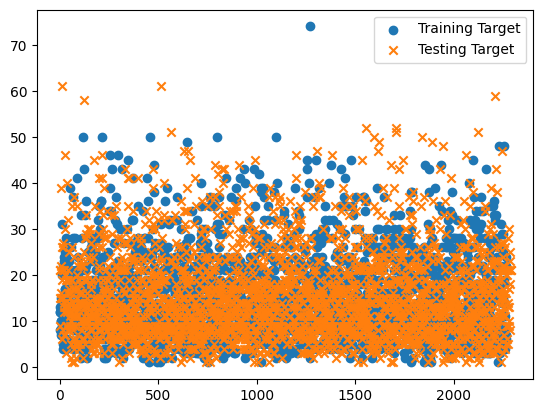

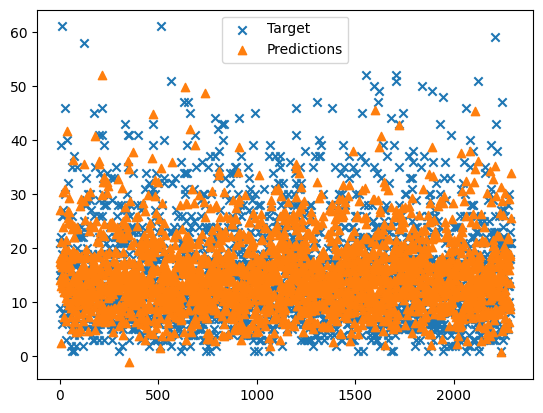

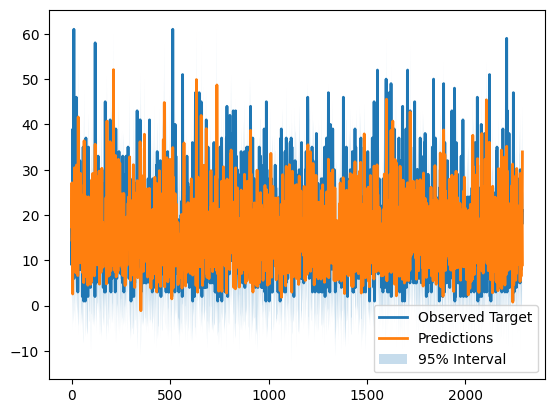

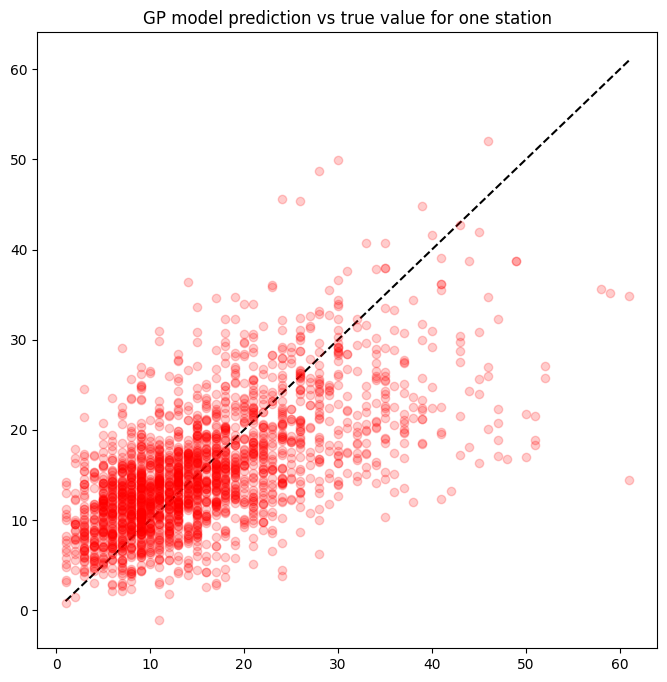

In [395]:
print('Mean of prediction')
#print(target_scaler.inverse_transform(post_mean))

mse = np.mean((target_scaler.inverse_transform(post_mean) - target_scaler.inverse_transform(gp_y_test))**2)
print("Mean Squared Error:", mse)

rmse = np.mean(np.sqrt((target_scaler.inverse_transform(post_mean) - target_scaler.inverse_transform(gp_y_test))**2))
print("Root Mean Squared Error:", rmse)

plt.scatter(range(0, len(gp_y)), target_scaler.inverse_transform(gp_y), marker='o')
plt.scatter(range(0, len(gp_y_test)), target_scaler.inverse_transform(gp_y_test), marker='x')
plt.legend(['Training Target', 'Testing Target', 'Predictions', '95% Interval'])
plt.show()


plt.scatter(range(0, len(gp_y_test)), target_scaler.inverse_transform(gp_y_test), marker='x')
plt.scatter(range(0, len(post_mean)), target_scaler.inverse_transform(post_mean), marker='^')
plt.legend(['Target', 'Predictions', '95% Interval'])
plt.show()

#plt.scatter(range(0,len(gp_y)), gp_y)
plt.plot(range(0,len(gp_y_test)), target_scaler.inverse_transform(gp_y_test), linewidth=2.)
plt.plot(range(0,len(gp_y_test)), target_scaler.inverse_transform(post_mean), linewidth=2.)
plt.fill_between(range(0,len(gp_y_test)), lw_bd.flatten(), up_bd.flatten(), alpha=0.25)
plt.legend(['Observed Target', 'Predictions', '95% Interval'])
plt.show()

# poster curves
# post_samples = np.random.multivariate_normal(post_mean, post_cov, size=20)
# plt.scatter(gp_x, gp_y)
# plt.plot(test_x, test_y, linewidth=2.)
# plt.plot(test_x, post_mean, linewidth=2.)
# plt.plot(test_x, post_samples.T, color='gray', alpha=0.25)
# plt.fill_between(test_x, lw_bd, up_bd, alpha=0.25)
# plt.legend(['Observed Data', 'True Function', 'Predictive Mean', 'Posterior Samples'])
# plt.show()
plt.figure(figsize=(8,8))    
plt.title('GP model prediction vs true value for one station')
plt.plot([min(target_scaler.inverse_transform(gp_y_test)),max(target_scaler.inverse_transform(gp_y_test))],
          [min(target_scaler.inverse_transform(gp_y_test)),max(target_scaler.inverse_transform(gp_y_test))],
            'k--')
plt.plot(target_scaler.inverse_transform(gp_y_test), target_scaler.inverse_transform(post_mean), 'ro', alpha=.2)
plt.show()


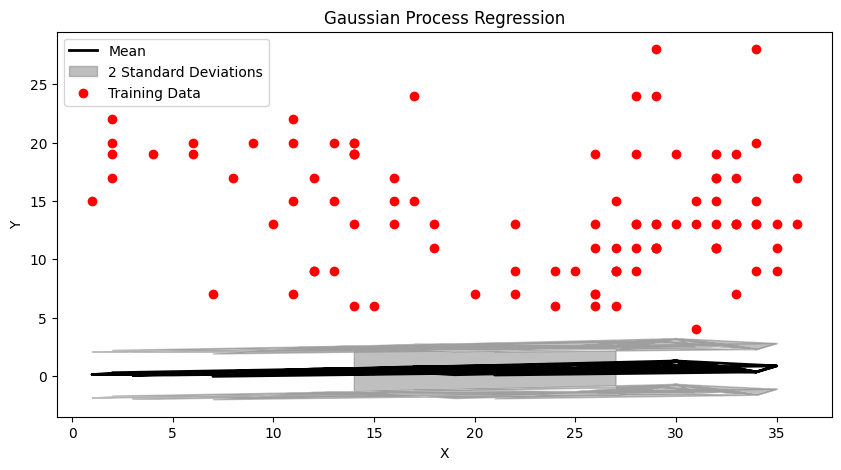

In [304]:
# Plot the predicted mean and two standard deviation intervals
plt.figure(figsize=(10, 5))
plt.plot(X_test, mu_s, 'k', lw=2, label='Mean')
plt.fill_between(X_test.flatten(), mu_s - 2*np.sqrt(np.diag(cov_s)), mu_s + 2*np.sqrt(np.diag(cov_s)), color='gray', alpha=0.5, label='2 Standard Deviations')
plt.scatter(X_train, Y_train, c='r', label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Gaussian Process Regression')
plt.show()

In [305]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

gpr = GaussianProcessRegressor(kernel=1*RBF(0.001), random_state=0, normalize_y=False).fit(gp_x, gp_x_test)

ValueError: Found input variables with inconsistent numbers of samples: [200, 20]

In [ ]:
gpr.score(gp_x, gp_x_test)

1.0

In [ ]:
gpr.score(gp_x_test, gp_x_test)

1.0

In [ ]:
gp_pred,_ = gpr.predict(gp_x, return_std=True)

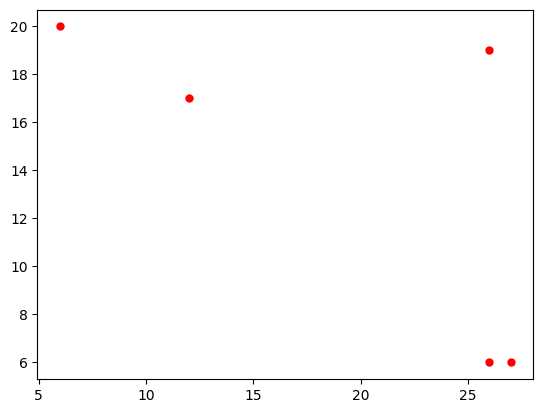

In [ ]:
plt.plot(gp_x, gp_y, 'r.', markersize=10, label='Observations')

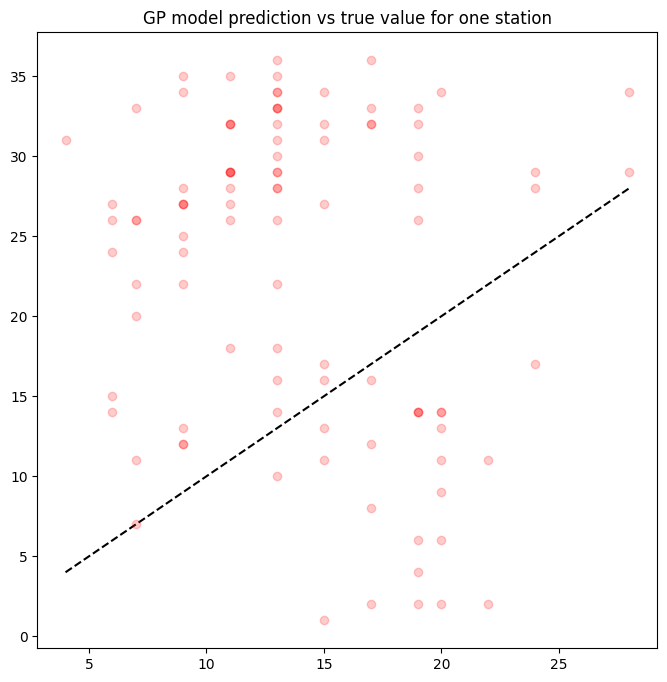

In [ ]:
#plt.plot(gp_y_test, gp_pred)
#plt.plot(gp_pred)
plt.figure(figsize=(8,8))    
plt.title('GP model prediction vs true value for one station')
plt.plot([min(gp_y),max(gp_y)], [min(gp_y),max(gp_y)], 'k--')
plt.plot(gp_y, gp_pred, 'ro', alpha=.2)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

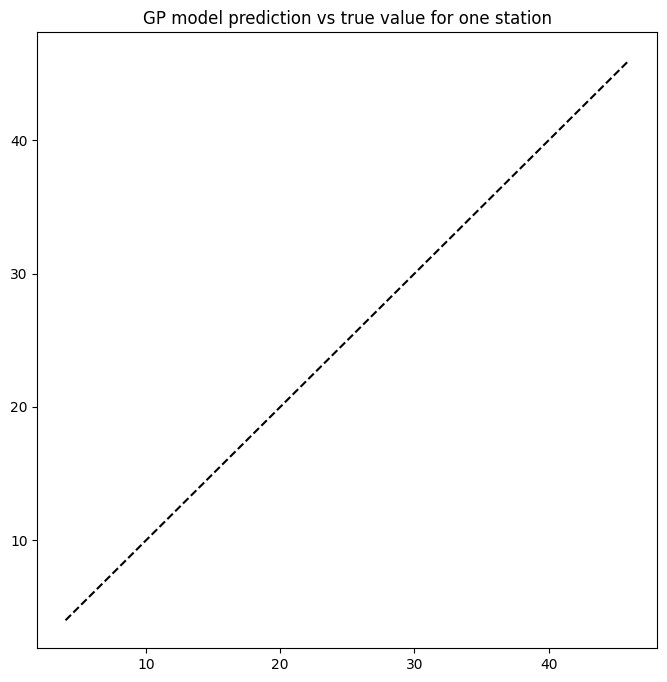

In [ ]:
#plt.plot(gp_y_test, gp_pred)
#plt.plot(gp_pred)
plt.figure(figsize=(8,8))    
plt.title('GP model prediction vs true value for one station')
plt.plot([min(gp_y_test),max(gp_y_test)], [min(gp_y_test),max(gp_y_test)], 'k--')
plt.plot(gp_y_test, gp_pred, 'ro', alpha=.2)
plt.show()

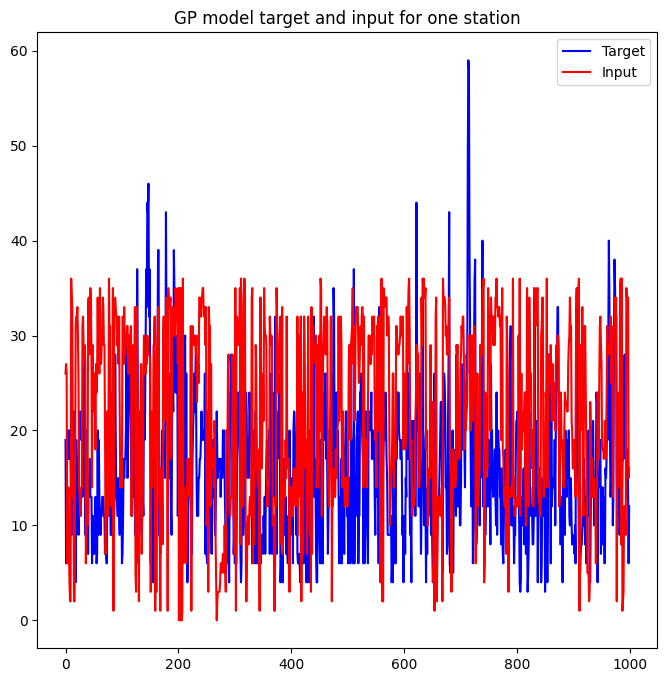

In [ ]:
plt.figure(figsize=(8,8))    
plt.title('GP model target and input for one station')
plt.plot(gp_y, c='b', label='Target')
plt.plot(gp_x, c='r', label='Input')
plt.legend(loc="upper right")
plt.show()

Epoch 1/50
32/32 [==============================] - 0s 2ms/step - loss: 551.2847 - r_squared: -4.6894
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 528.5025 - r_squared: -4.7493
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 505.9407 - r_squared: -4.3085
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 483.1865 - r_squared: -3.9795
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 458.9328 - r_squared: -3.7821
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 433.7520 - r_squared: -3.6120
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 408.4604 - r_squared: -3.2704
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 383.7705 - r_squared: -2.9768
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 359.0970 - r_squared: -2.7167
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 334.8753 

32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 678us/step


32/32 [==============================] - 0s 612us/step


32/32 [==============================] - 0s 578us/step


32/32 [==============================] - 0s 724us/step


32/32 [==============================] - 0s 644us/step


32/32 [==============================] - 0s 772us/step


32/32 [==============================] - 0s 707us/step


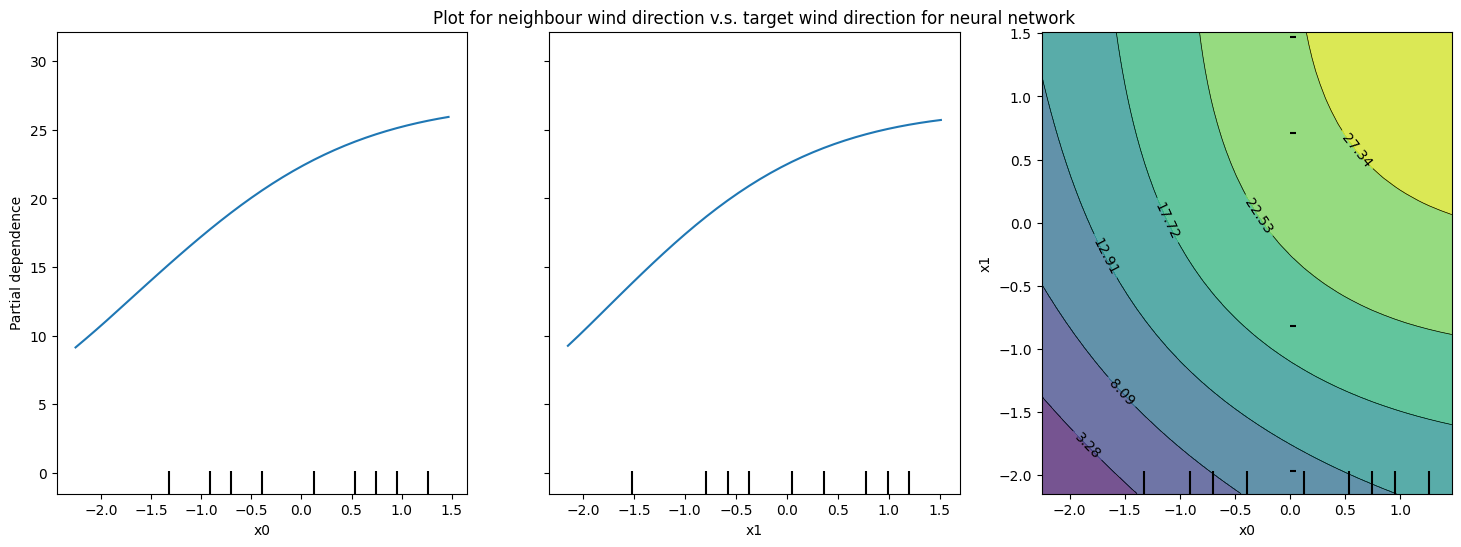

In [ ]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

# Select features to plot
x = test_x[['3','13']][0:1000] #.sample(frac=0.001, random_state=1)
x = x.rename(columns={'4': 'Neighbour1 wind direction', '10': 'Neighbour2 wind direction'})
y = test_y['1'][0:1000] #.sample(frac=0.001, random_state=1)

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind direction", 'nn')


FCM training RMSE: 6.084922085958807


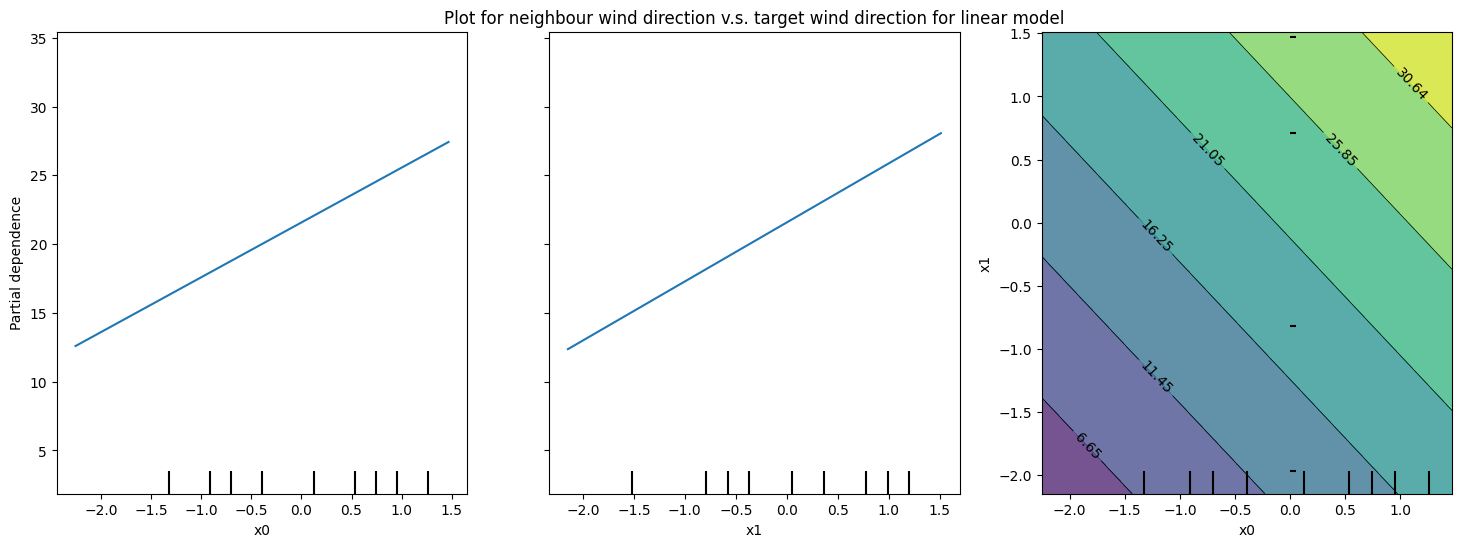

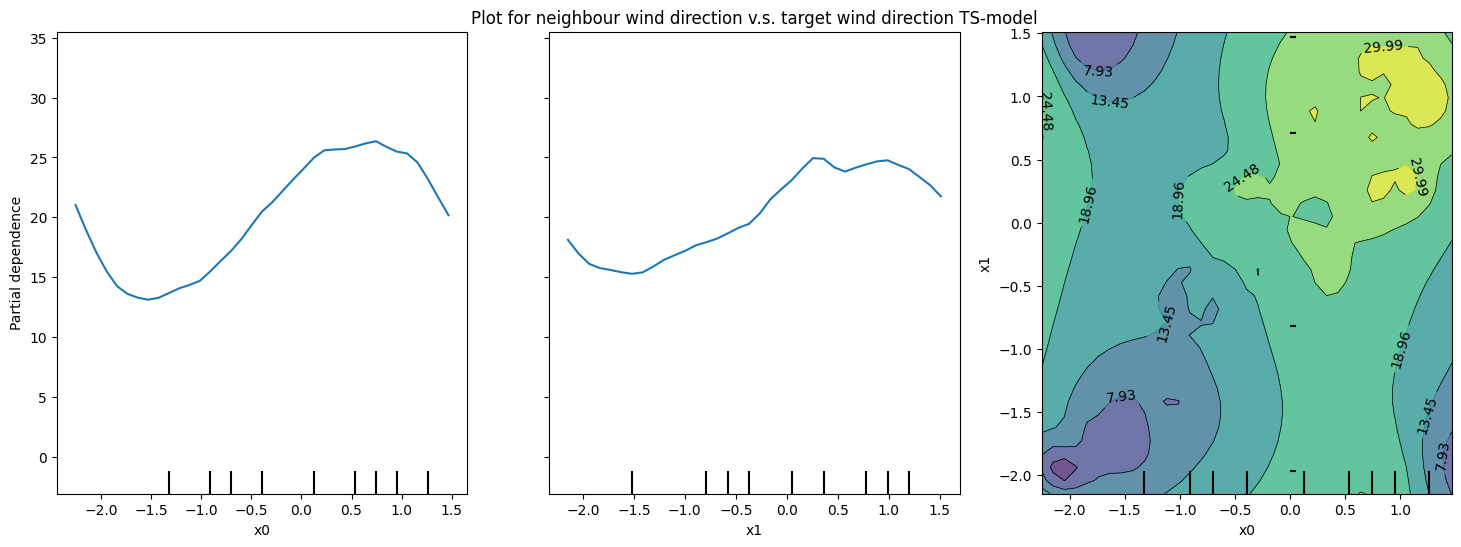

In [ ]:
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind direction", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind direction v.s. target wind direction", 'ts')


FCM training RMSE: 8.851635526891254
Epoch 1/50
32/32 [==============================] - 0s 4ms/step - loss: 555.4907 - r_squared: -4.8751
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 540.8557 - r_squared: -4.7321
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 526.3622 - r_squared: -4.4425
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 510.6407 - r_squared: -4.3268
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 494.1124 - r_squared: -4.7612
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 476.9717 - r_squared: -4.0180
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 458.8150 - r_squared: -3.8310
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 440.5399 - r_squared: -4.1945
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 421.9381 - r_squared: -3.7545
Epoch 10/50
32/32 [==========================

32/32 [==============================] - 0s 856us/step


32/32 [==============================] - 0s 693us/step


32/32 [==============================] - 0s 666us/step


32/32 [==============================] - 0s 1ms/step


32/32 [==============================] - 0s 740us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 1ms/step


32/32 [==============================] - 0s 758us/step


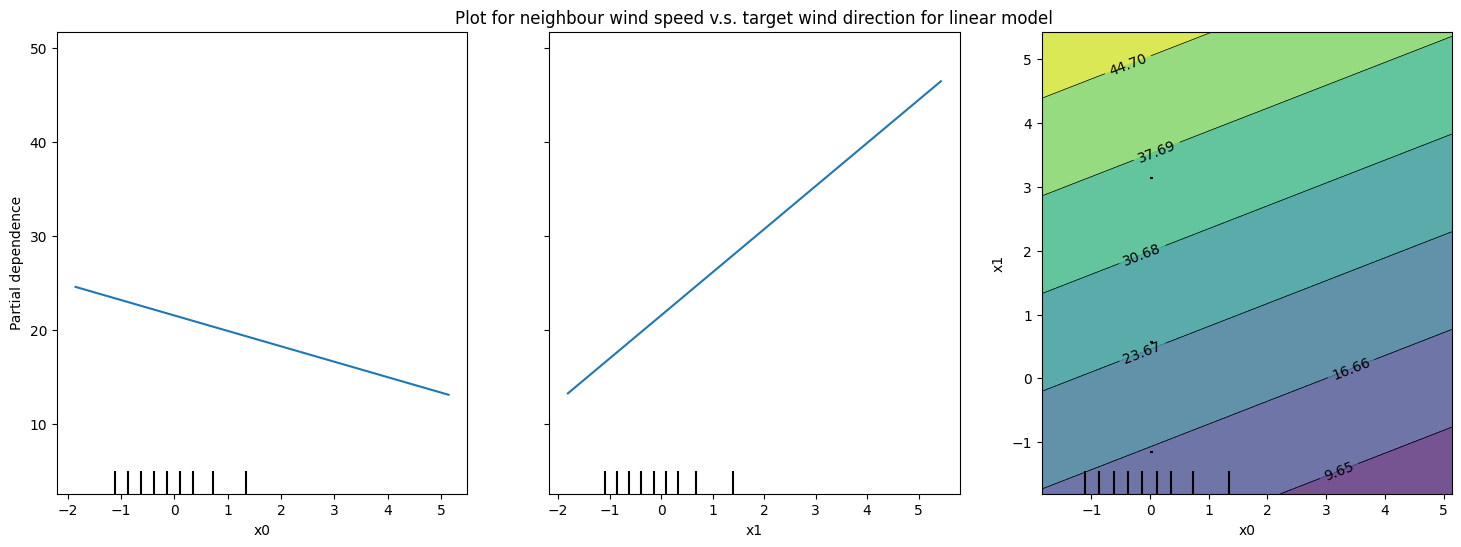

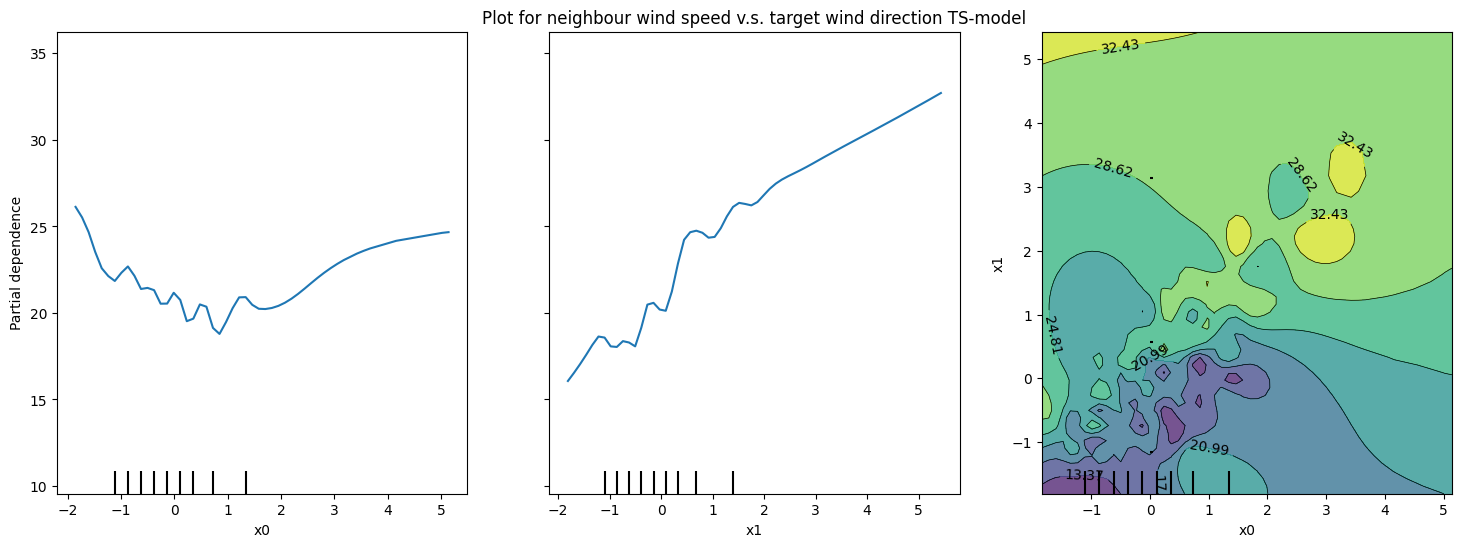

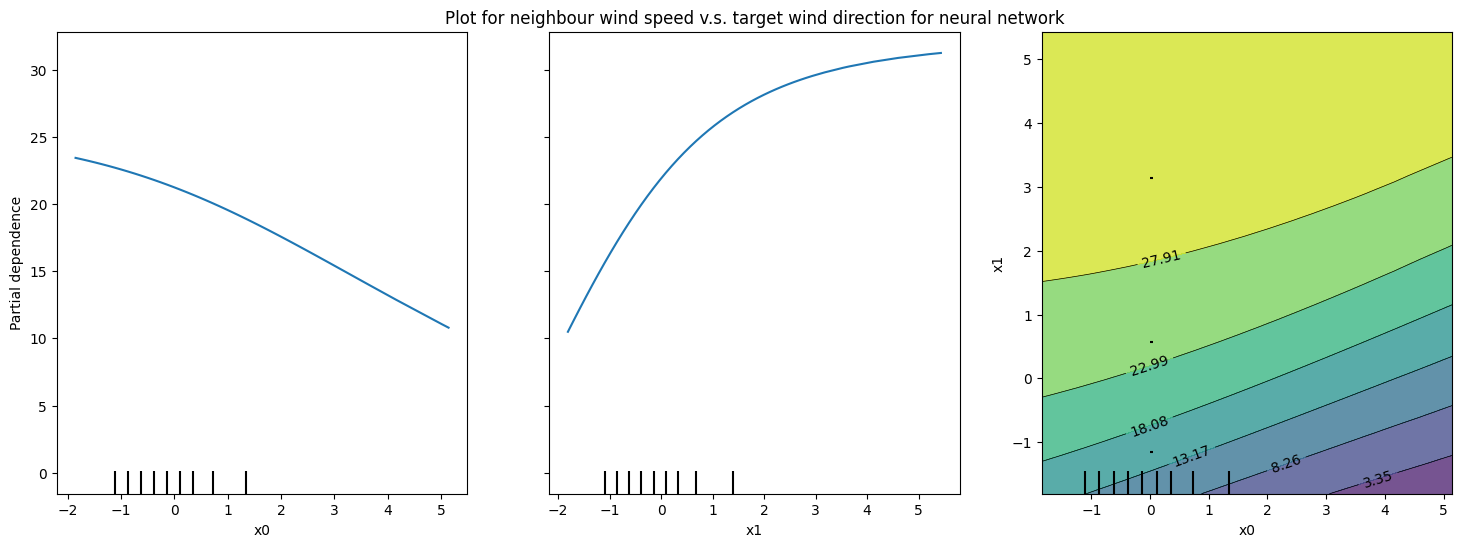

In [ ]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

# Select features to plot
x = test_x[['4','14']][0:1000]
x = x.rename(columns={'4': 'Neighbour1 wind speed', '10': 'Neighbour2 wind speed'})
y = test_y['1'][0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind direction", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind direction", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour wind speed v.s. target wind direction", 'nn')

FCM training RMSE: 9.054742745460107
Epoch 1/50
32/32 [==============================] - 0s 5ms/step - loss: 554.5967 - r_squared: -4.8767
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 537.5652 - r_squared: -4.6495
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 520.1767 - r_squared: -4.5979
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 502.4461 - r_squared: -4.2575
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 484.1299 - r_squared: -4.3069
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 465.0974 - r_squared: -3.9649
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 445.9554 - r_squared: -3.7295
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 427.2784 - r_squared: -3.5457
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 408.3219 - r_squared: -3.3414
Epoch 10/50
32/32 [==========================

32/32 [==============================] - 0s 769us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 676us/step


32/32 [==============================] - 0s 633us/step


32/32 [==============================] - 0s 648us/step


32/32 [==============================] - 0s 836us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 569us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 745us/step


32/32 [==============================] - 0s 686us/step


32/32 [==============================] - 0s 739us/step


32/32 [==============================] - 0s 642us/step


32/32 [==============================] - 0s 588us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 691us/step


32/32 [==============================] - 0s 644us/step


32/32 [==============================] - 0s 804us/step


32/32 [==============================] - 0s 611us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 644us/step


32/32 [==============================] - 0s 709us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 662us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 1ms/step


32/32 [==============================] - 0s 547us/step


32/32 [==============================] - 0s 739us/step


32/32 [==============================] - 0s 681us/step


32/32 [==============================] - 0s 581us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 579us/step


32/32 [==============================] - 0s 644us/step


32/32 [==============================] - 0s 645us/step


32/32 [==============================] - 0s 579us/step


32/32 [==============================] - 0s 627us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 677us/step


32/32 [==============================] - 0s 631us/step


32/32 [==============================] - 0s 644us/step


32/32 [==============================] - 0s 645us/step


32/32 [==============================] - 0s 642us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 740us/step


32/32 [==============================] - 0s 675us/step


32/32 [==============================] - 0s 772us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 677us/step


32/32 [==============================] - 0s 707us/step


32/32 [==============================] - 0s 647us/step


32/32 [==============================] - 0s 643us/step


32/32 [==============================] - 0s 858us/step


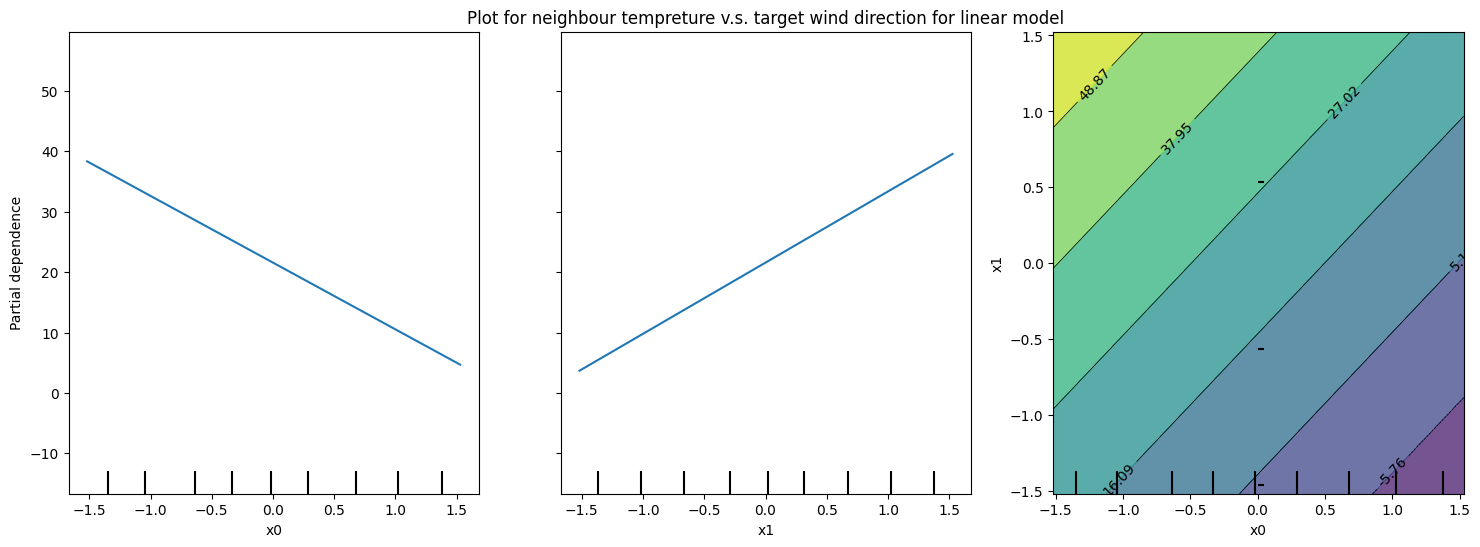

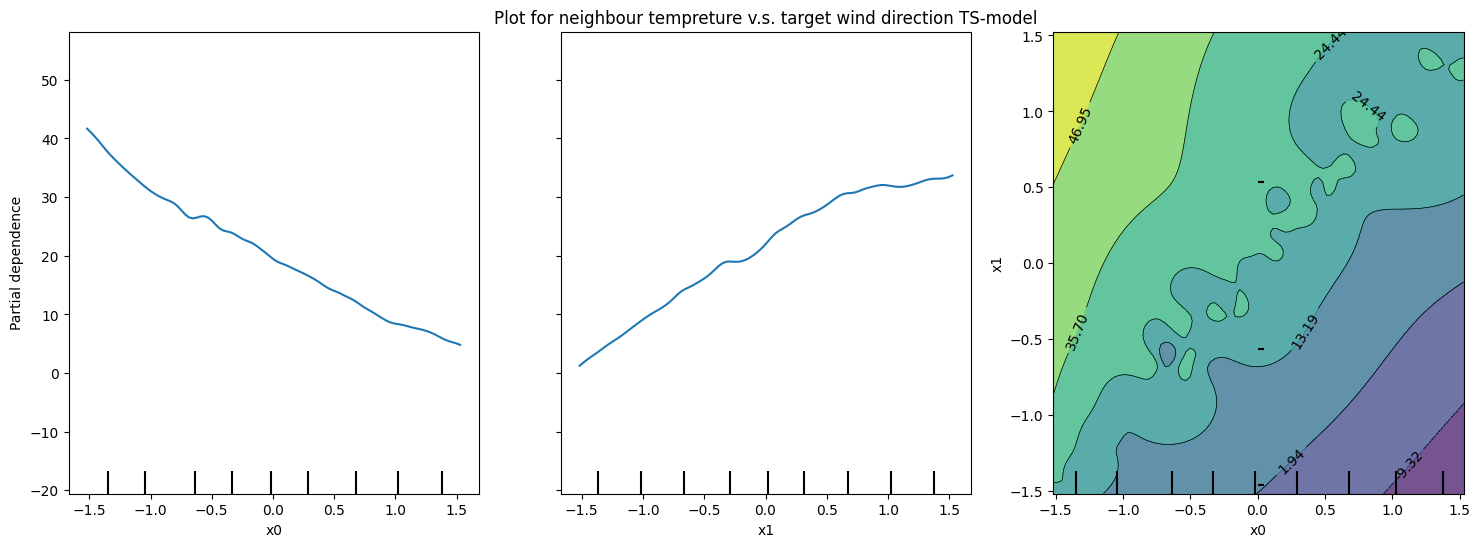

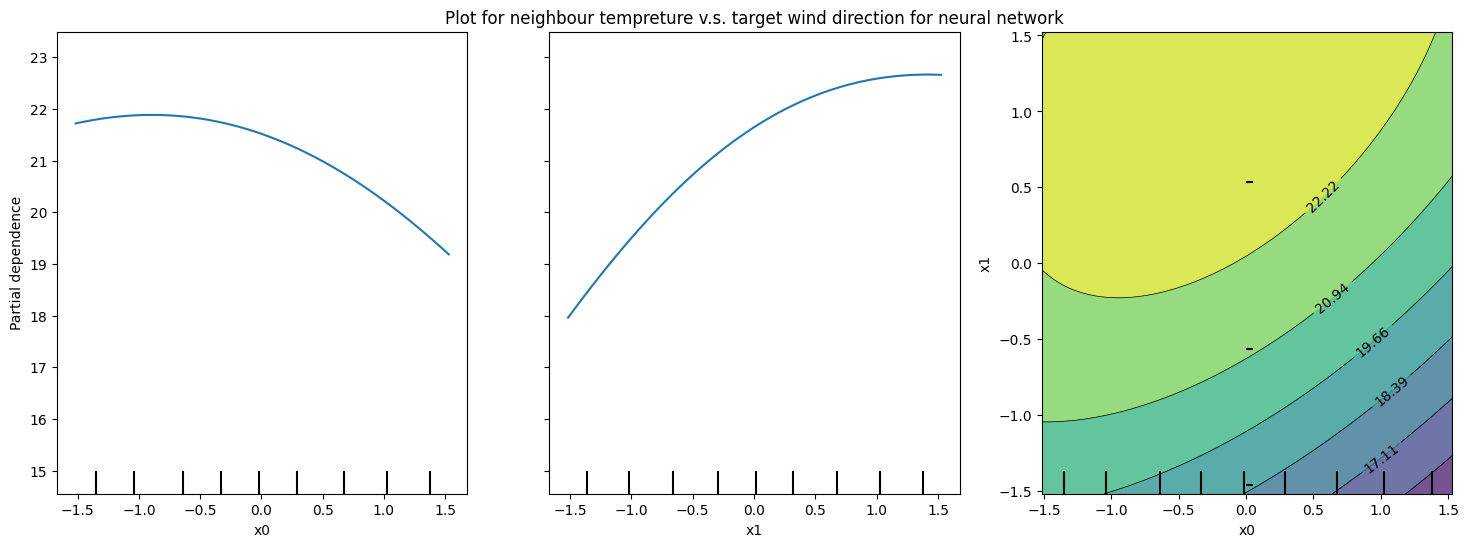

In [ ]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

# Select features to plot
x = test_x[['2','12']][0:1000]
x = x.rename(columns={'4': 'Neighbour1 tempreture', '10': 'Neighbour2 tempreture'})
y = test_y['1'][0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour tempreture v.s. target wind direction", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour tempreture v.s. target wind direction", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour tempreture v.s. target wind direction", 'nn')

In [ ]:
test_x

0       1     2     3     4    5    6    7    8           9  \
0       53.31 -113.58  28.7  26.0  17.0  0.0  1.0  0.0  0.0   58.472577   
1       53.31 -113.58  27.1  27.0   6.0  0.0  1.0  0.0  0.0   58.472577   
2       53.31 -113.58   9.4  26.0   4.0  0.0  1.0  0.0  0.0   58.472577   
3       53.31 -113.58  21.9   6.0  14.0  0.0  1.0  0.0  0.0   58.472577   
4       53.31 -113.58  24.5  12.0  16.0  0.0  1.0  0.0  0.0   58.472577   
...       ...     ...   ...   ...   ...  ...  ...  ...  ...         ...   
228995  52.42 -114.91  14.9   5.0   8.0  0.0  0.0  1.0  0.0  143.796354   
228996  52.42 -114.91  10.0  34.0   8.0  0.0  0.0  1.0  0.0  143.796354   
228997  52.42 -114.91   4.9  30.0   3.0  0.0  0.0  1.0  0.0  143.796354   
228998  52.42 -114.91  19.1  17.0   5.0  0.0  0.0  1.0  0.0  143.796354   
228999  52.42 -114.91   5.4   8.0   2.0  0.0  0.0  1.0  0.0  143.796354   

           10      11    12    13    14   15   16   17   18          19  
0       53.51 -112.10  29.4  21.0  11.0  0.0  1.0  0.0  0.0   70.193918  
1       53.51 -112.10  28.8  25.0   7.0  0.0  1.0  0.0  0.0   70.193918  
2       53.51 -112.10  12.1  31.0   9.0  0.0  1.0  0.0  0.0   70.193918  
3       53.51 -112.10  23.8   8.0  17.0  0.0  1.0  0.0  0.0   70.193918  
4       53.51 -112.10  25.4  10.0  13.0  0.0  1.0  0.0  0.0   70.193918  
...       ...     ...   ...   ...   ...  ...  ...  ...  ...         ...  
228995  51.12 -114.01  18.7  12.0  12.0  0.0  0.0  1.0  0.0  108.022912  
228996  51.12 -114.01  16.7   8.0   4.0  0.0  0.0  1.0  0.0  108.022912  
228997  51.12 -114.01  11.8  35.0  13.0  0.0  0.0  1.0  0.0  108.022912  
228998  51.12 -114.01  20.2  36.0   7.0  0.0  0.0  1.0  0.0  108.022912  
228999  51.12 -114.01  13.4  35.0   4.0  0.0  0.0  1.0  0.0  108.022912  

[229000 rows x 20 columns]

FCM training RMSE: 10.065837507407766
Epoch 1/50
32/32 [==============================] - 0s 3ms/step - loss: 560.0947 - r_squared: -4.7493
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 551.5930 - r_squared: -4.8225
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 544.3692 - r_squared: -4.9115
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 537.4004 - r_squared: -4.6351
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 531.0163 - r_squared: -4.5973
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 525.5594 - r_squared: -4.5755
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 520.5480 - r_squared: -4.5487
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 515.7621 - r_squared: -4.3753
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 511.4915 - r_squared: -4.4533
Epoch 10/50
32/32 [=========================

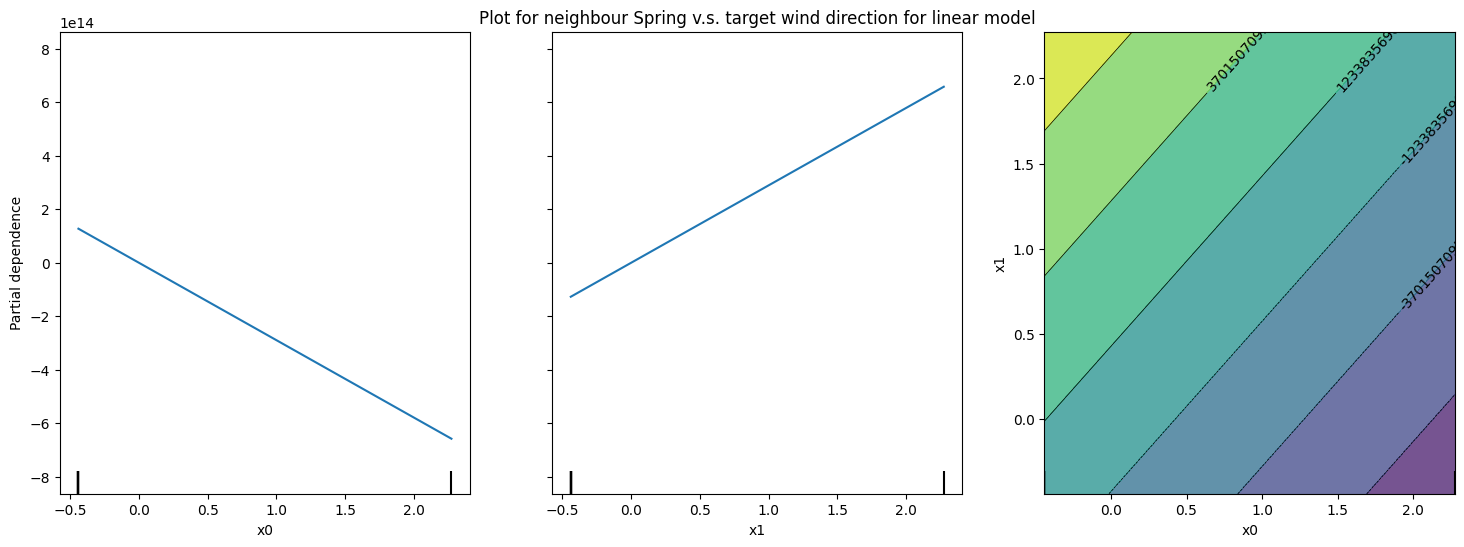

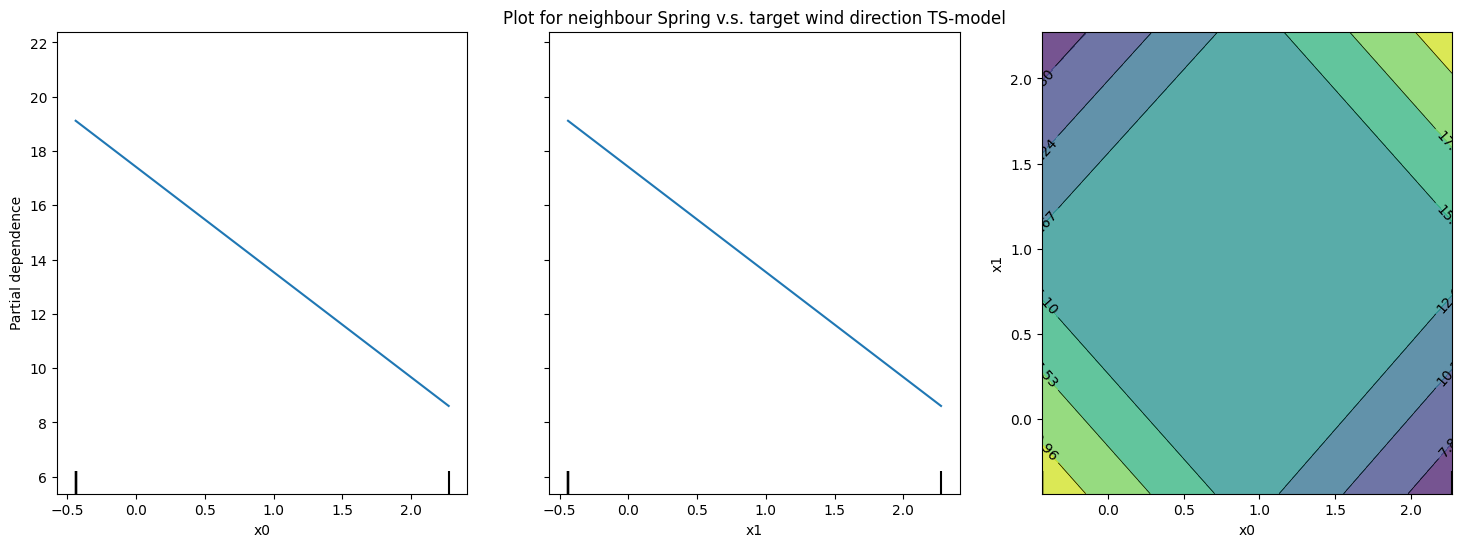

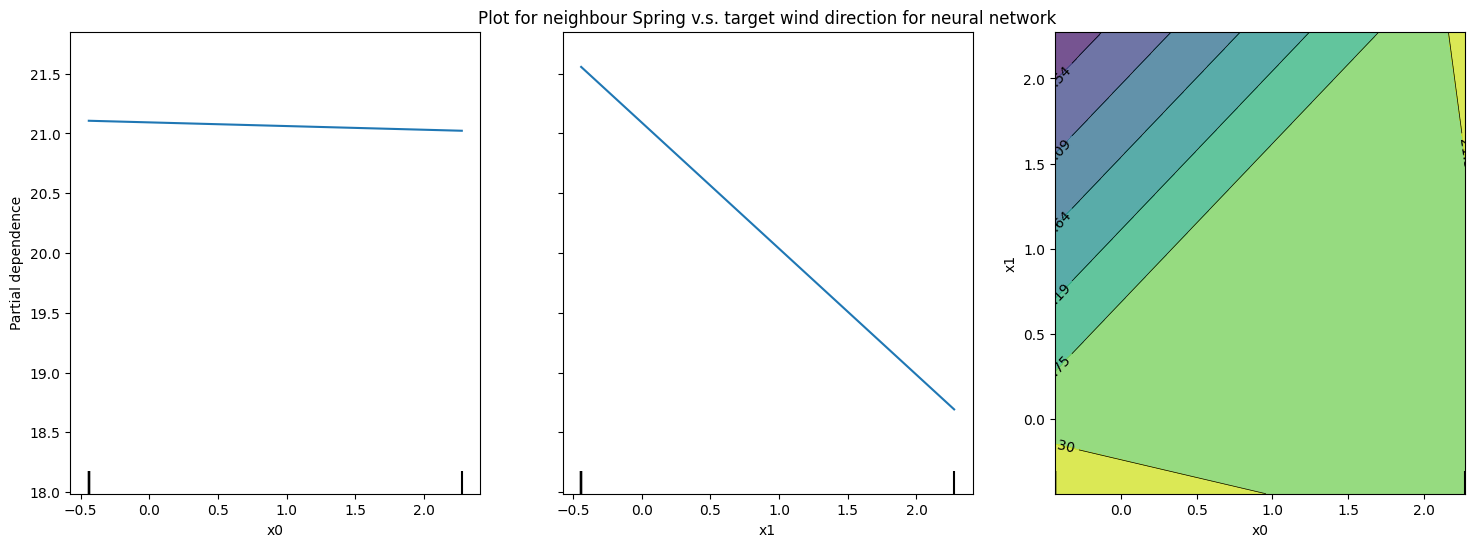

In [ ]:
# Code for partial dependency plot
# Modified from source: https://scikit-learn.org/stable/modules/partial_dependence.html
# and source: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

# Select features to plot
x = test_x[['5','15']][0:1000]
x = x.rename(columns={'4': 'Neighbour1 Spring', '10': 'Neighbour2 Srping'})
y = test_y['1'][0:1000]

plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour Spring v.s. target wind direction", 'linear')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour Spring v.s. target wind direction", 'ts')
plot_partial_dependence_plot_for_data(x, y, "Plot for neighbour Spring v.s. target wind direction", 'nn')

Text(0.5, 1.0, 'Linear model prediction vs true value for testing data')

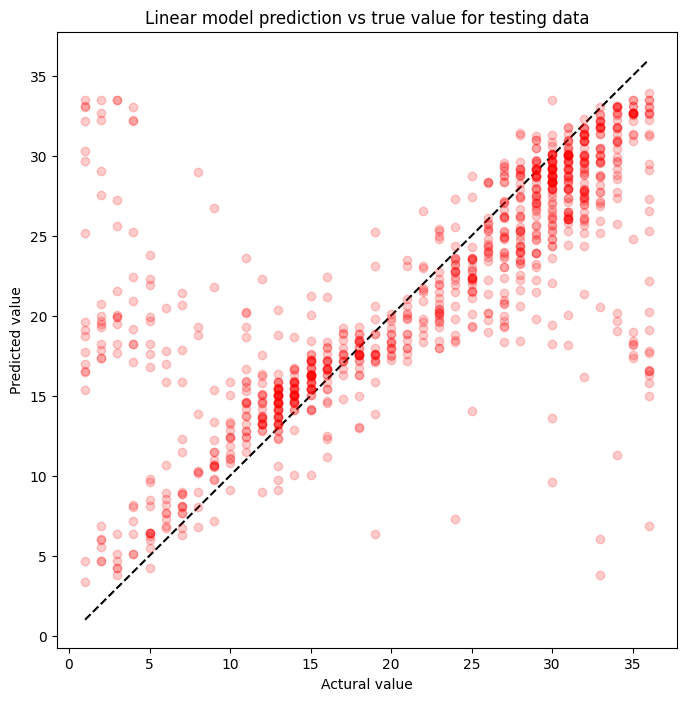

In [ ]:
pred = LinearRegression().fit(x, y).predict(x)

plt.figure(figsize=(8,8))    
plt.plot([min(y),max(y)], [min(y),max(y)], 'k--')
plt.plot(y,pred, 'ro', alpha=.2)
plt.xlabel('Actural value')
plt.ylabel('Predicted value')
plt.title('Linear model prediction vs true value for testing data')

In [ ]:
print(np.corrcoef(pred, y))
print(mean_squared_error(pred, y, squared=False))

[[1.         0.72266008]
 [0.72266008 1.        ]]
6.957930654059737


In [ ]:
# First train the model on the entire training data

# Try different learning rate
# activation function
# try a small NN network
neural_network_model = build_neural_network_model()


neural_network_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[KerasRegressor.r_squared]
)

history = neural_network_model.fit(
    test_x, 
    test_y['1'], 
    epochs=50, 
    shuffle=True
)

Epoch 1/50
7157/7157 [==============================] - 11s 1ms/step - loss: 80.7783 - r_squared: 0.1410
Epoch 2/50
7157/7157 [==============================] - 10s 1ms/step - loss: 66.6435 - r_squared: 0.2948
Epoch 3/50
7157/7157 [==============================] - 11s 1ms/step - loss: 66.0503 - r_squared: 0.2994
Epoch 4/50
7157/7157 [==============================] - 10s 1ms/step - loss: 65.9755 - r_squared: 0.3018
Epoch 5/50
7157/7157 [==============================] - 10s 1ms/step - loss: 65.8284 - r_squared: 0.3028
Epoch 6/50
7157/7157 [==============================] - 10s 1ms/step - loss: 65.6402 - r_squared: 0.3050
Epoch 7/50
7157/7157 [==============================] - 10s 1ms/step - loss: 65.4859 - r_squared: 0.3070
Epoch 8/50
7157/7157 [==============================] - 10s 1ms/step - loss: 65.3877 - r_squared: 0.3068
Epoch 9/50
7157/7157 [==============================] - 11s 1ms/step - loss: 65.0795 - r_squared: 0.3111
Epoch 10/50
7157/7157 [==============================] 

Text(0.5, 1.0, 'Loss of neural network')

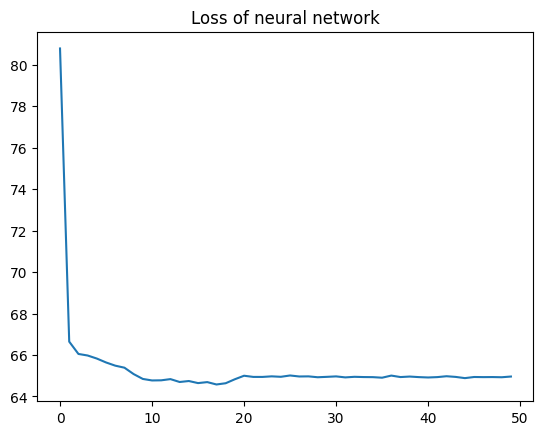

In [ ]:
# Include this loss curve in report 

plt.plot(history.history['loss'])
plt.title('Loss of neural network')

In [ ]:
max(test_y['1'])

36.0

7157/7157 [==============================] - 4s 542us/step


Text(0.5, 1.0, 'Neural network model prediction of wind direction vs true value for testing data')

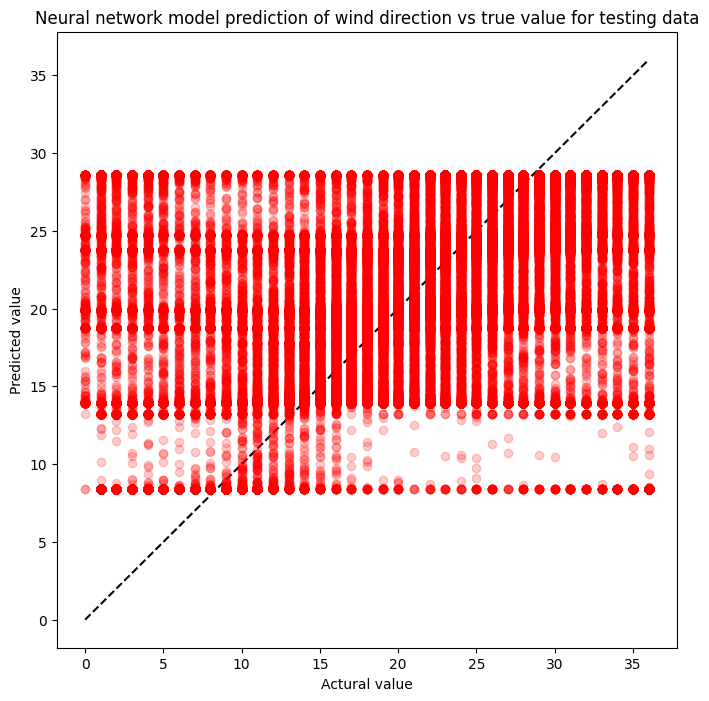

In [ ]:
pred = neural_network_model.predict(test_x)

plt.figure(figsize=(8,8))    
plt.plot([min(test_y['1']),max(test_y['1'])], [min(test_y['1']),max(test_y['1'])], 'k--')
plt.plot(test_y['1'], pred, 'ro', alpha=.2)
plt.xlabel('Actural value')
plt.ylabel('Predicted value')
plt.title('Neural network model prediction of wind direction vs true value for testing data')

In [ ]:
model = TsModel.TsModel()
model.fit(test_x,test_y['1'])

FCM training RMSE: 7.856545889945628


(61.72531332082154, 7.856545889945628, 57.61768341064453)

Text(0.5, 1.0, 'TS model model prediction of wind direction vs true value for testing data')

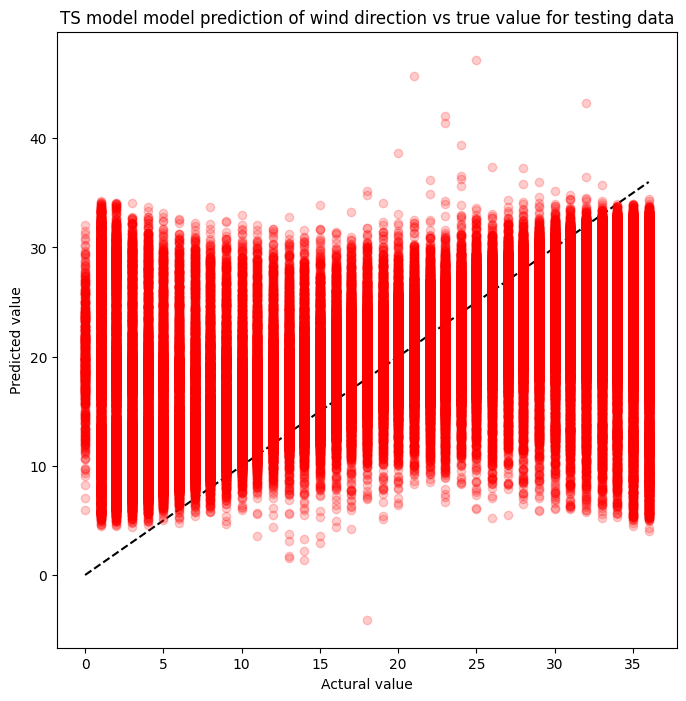

In [ ]:
pred = model.predict(test_x)

plt.figure(figsize=(8,8))    
plt.plot([min(test_y['1']),max(test_y['1'])], [min(test_y['1']),max(test_y['1'])], 'k--')
plt.plot(test_y['1'], pred, 'ro', alpha=.2)
plt.xlabel('Actural value')
plt.ylabel('Predicted value')
plt.title('TS model model prediction of wind direction vs true value for testing data')

In [ ]:
print(mean_squared_error(train_y, pred, squared=False))

7.233216163641223


In [ ]:
# All stations in the dataset
stations_to_test = [
    'LETHBRIDGE CDA',                 
    'EDMONTON STONY PLAIN CS',        
    'CORONATION CLIMATE',             
    'STRATHMORE AGDM',                
    'LLOYDMINSTER',                  
    'MEDICINE HAT RCS',             
    'MILK RIVER',                     
    'CAMROSE',                     
    'BROOKS',                    
    'CLARESHOLM',           
    'ONEFOUR CDA',            
    'VEGREVILLE',             
    'ROCKY MTN HOUSE (AUT)',         
    'LACOMBE CDA 2',              
    'BANFF CS',                     
    'DRUMHELLER EAST',         
    'MEDICINE HAT',                 
    'LETHBRIDGE',                 
    'EDMONTON INTL A',         
    'CALGARY INTL A'
]

In [ ]:
def plot_prediction_error(y, y_prediction, station_name, axis_limit, axis):
    rmse = np.round(mean_squared_error(y, y_prediction, squared=False),4)

    axis.set_ylim(0,axis_limit)
    axis.set_xlim(0,axis_limit)
    axis.plot([0, axis_limit], [0, axis_limit], 'k--')
    axis.plot(y, y_prediction, 'ro', alpha=.2, label=f"RMSE for station = {rmse}")
    axis.legend(loc="upper left")
    axis.set_title(f"True v.s. predicted wind speed for \n {station_name}", wrap=True)

In [ ]:
def plot_train_test_prediction_error(train_y, train_prediction, test_y, test_prediction, station_name):
    axis_limit = np.max([np.max(np.array(train_y).flatten()), np.max(np.array(test_y).flatten())])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    plot_prediction_error(train_y, train_prediction, station_name +' on training data', axis_limit, ax1)
    plot_prediction_error(test_y, test_prediction, station_name +' on testing data', axis_limit, ax2)    
    
    plt.show()

In [ ]:
plt.rcParams.update({'font.size': 18})

In [ ]:
# plots for training data
train_prediction_per_stations = {}

for station in stations_to_test:
#     features, target = Data_utils.generate_data(
#         train_data, 
#         station, 
#         9, 
#         100000, 
#         0
#     )
#     x = np.array(features)
#     x = scaler.transform(x)
#     y = np.array(target)
    
#     temp_x = pd.DataFrame(x)
#     temp_x.to_csv(f"Data/visualization_data/{station}_x.csv")
#     temp_y = pd.DataFrame(y)
#     temp_y.to_csv(f"Data/visualization_data/{station}_y.csv")
    
    #train_x = pd.read_csv(f"Data/visualization_data/{station}_x.csv", index_col=0)
    #train_y = pd.read_csv(f"Data/visualization_data/{station}_y.csv", index_col=0)

    #train_prediction = np.array(neural_network_model.predict(train_x)).flatten()

    features, target = Data_utils.generate_data(
        test_data, 
        station, 
        9, 
        100000, 
        0
    )
    test_x = np.array(features)
    test_x = scaler.transform(test_x)
    test_y = np.array(target)

    test_prediction = np.array(neural_network_model.predict(test_x)).flatten()
    
    #plot_train_test_prediction_error(train_y, train_prediction, test_y, test_prediction, station)
    
    # Record the RMSE
    train_prediction_per_stations[station] = np.round(mean_squared_error(test_y, test_prediction, squared=False),4)

172/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


206/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


187/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


200/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


177/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


218/358 [=================>............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


171/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


153/358 [===========>..................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


165/358 [============>.................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


168/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


161/358 [============>.................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


175/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


173/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


176/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


151/358 [===========>..................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


189/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


196/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 697us/step


In [ ]:
train_prediction_per_stations

{'LETHBRIDGE CDA': 4.881,
 'EDMONTON STONY PLAIN CS': 3.8545,
 'CORONATION CLIMATE': 5.5071,
 'STRATHMORE AGDM': 5.2967,
 'LLOYDMINSTER': 6.1567,
 'MEDICINE HAT RCS': 3.7104,
 'MILK RIVER': 7.096,
 'CAMROSE': 4.2746,
 'BROOKS': 5.2531,
 'CLARESHOLM': 6.8771,
 'ONEFOUR CDA': 8.056,
 'VEGREVILLE': 4.6378,
 'ROCKY MTN HOUSE (AUT)': 4.8587,
 'LACOMBE CDA 2': 4.4527,
 'BANFF CS': 4.018,
 'DRUMHELLER EAST': 4.7685,
 'MEDICINE HAT': 4.6794,
 'LETHBRIDGE': 6.1632,
 'EDMONTON INTL A': 4.8375,
 'CALGARY INTL A': 6.4294}

181/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 760us/step


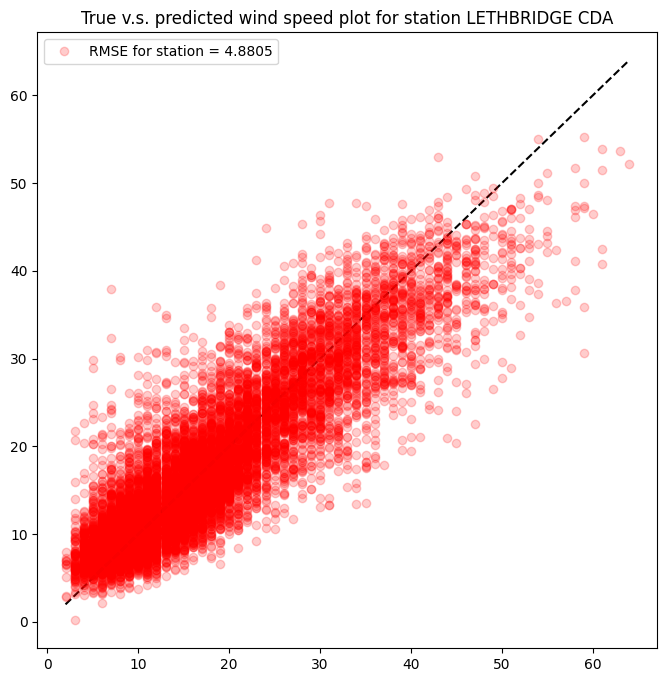

177/358 [=============>................] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 840us/step


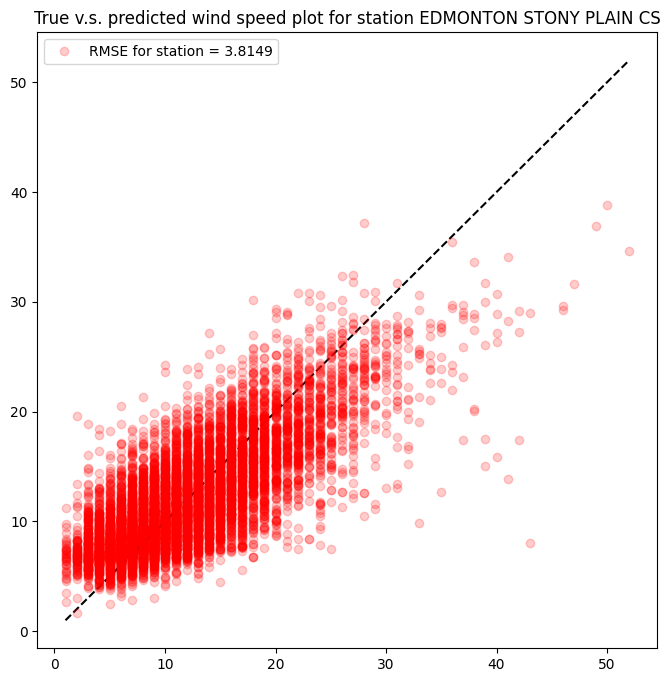

205/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 681us/step


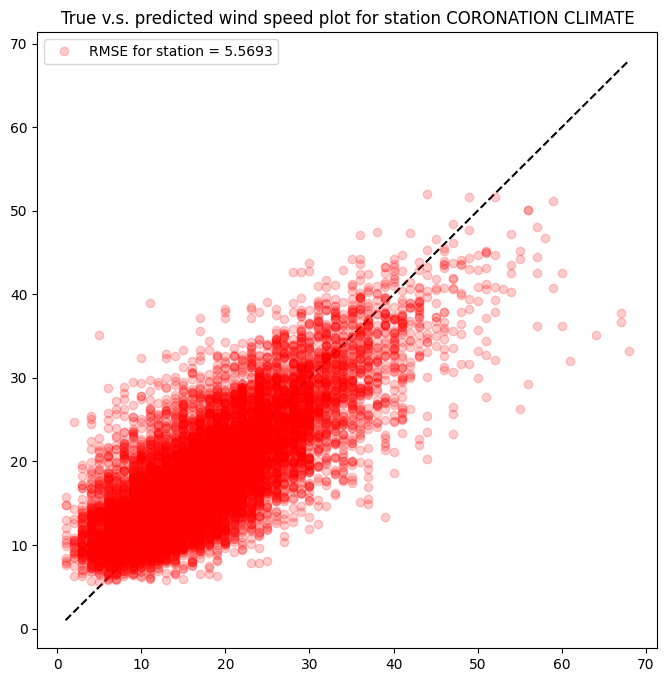

196/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 747us/step


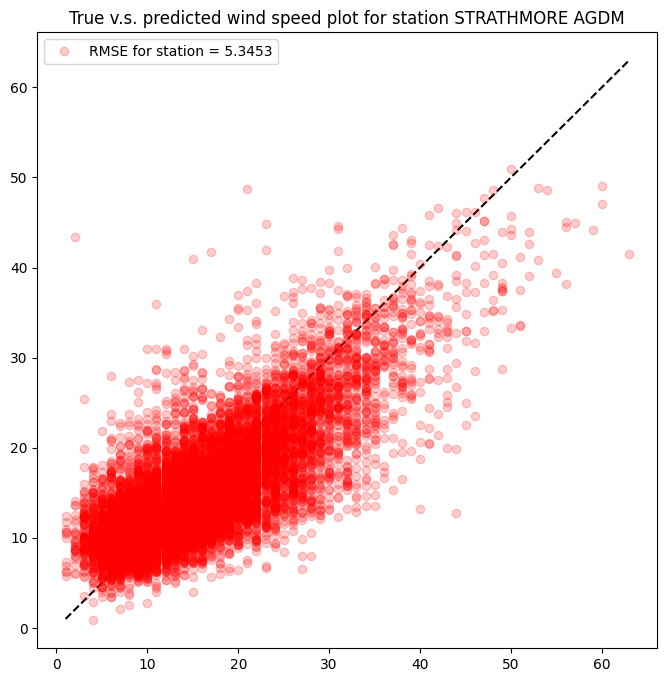

191/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 755us/step


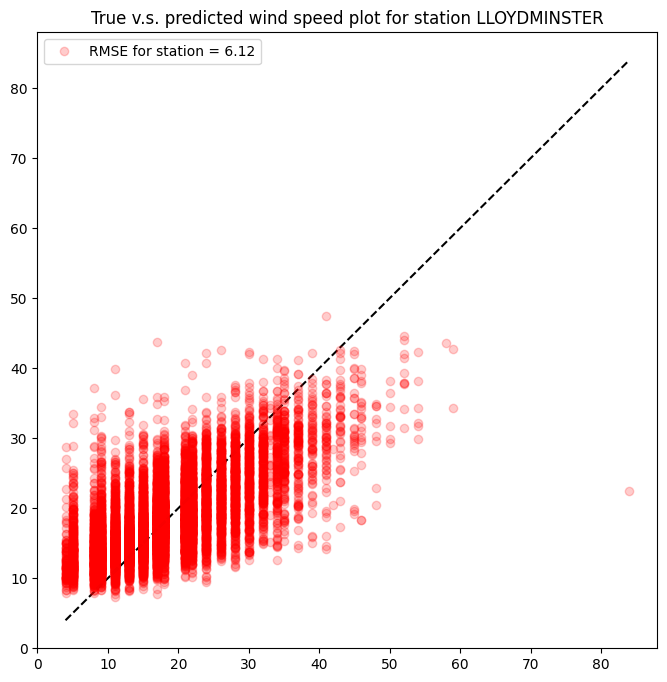

240/358 [===================>..........] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 604us/step


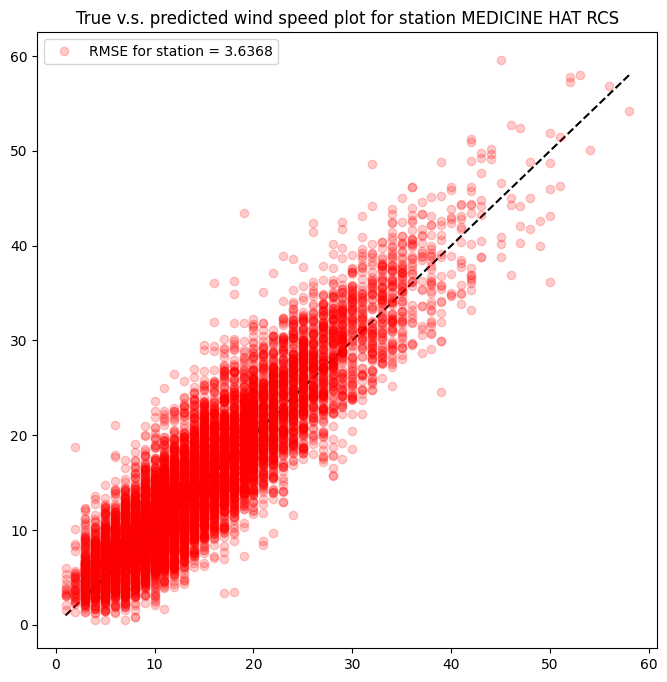

195/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 782us/step


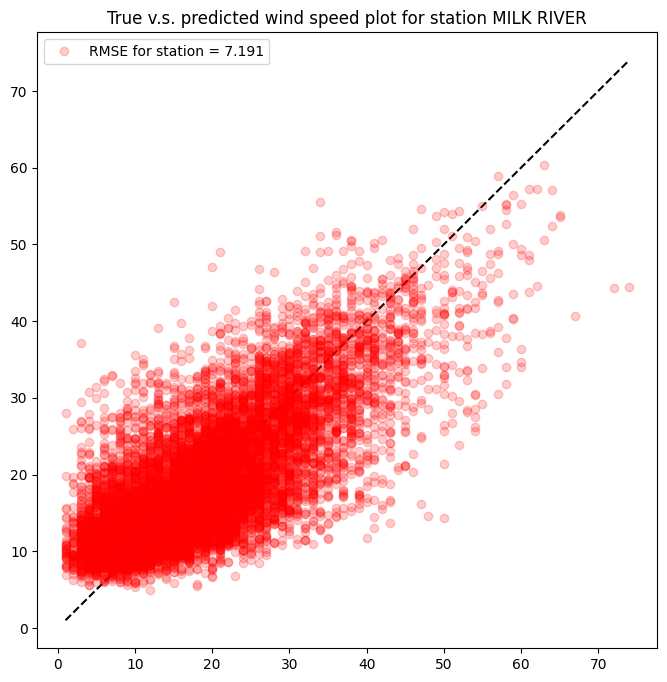

200/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 747us/step


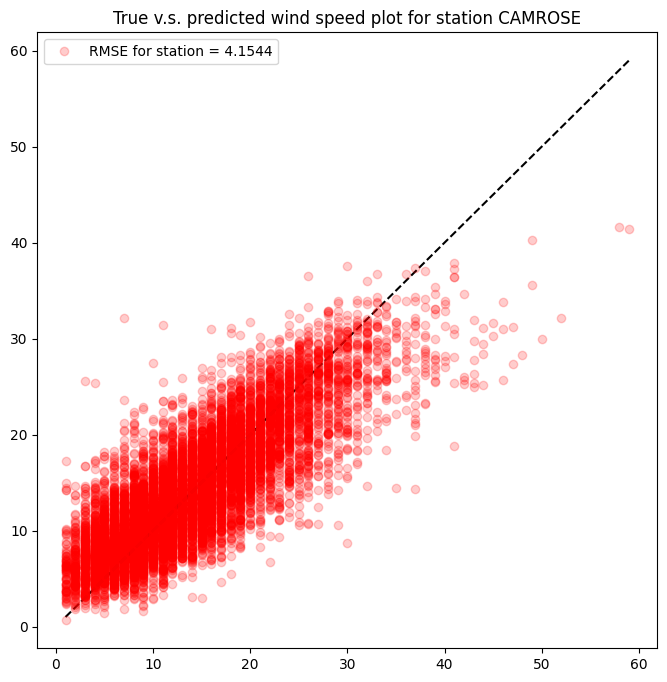

190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 801us/step


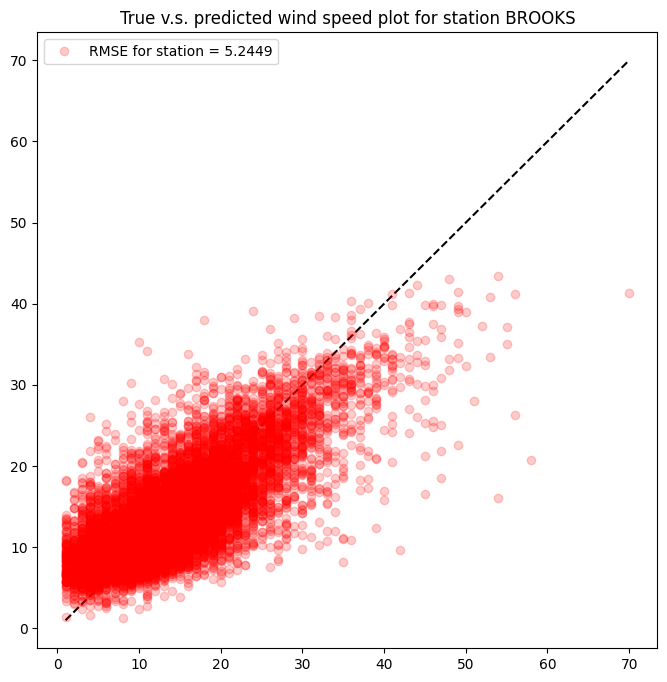

182/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 755us/step


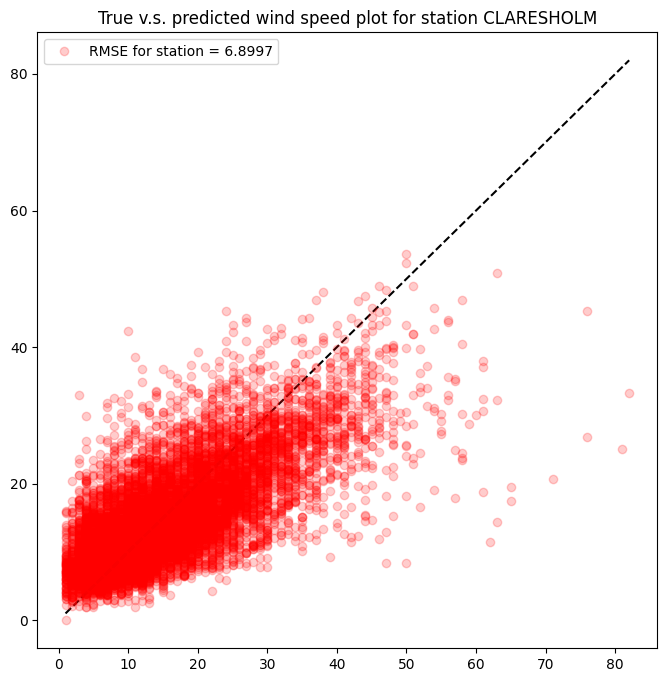

185/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 781us/step


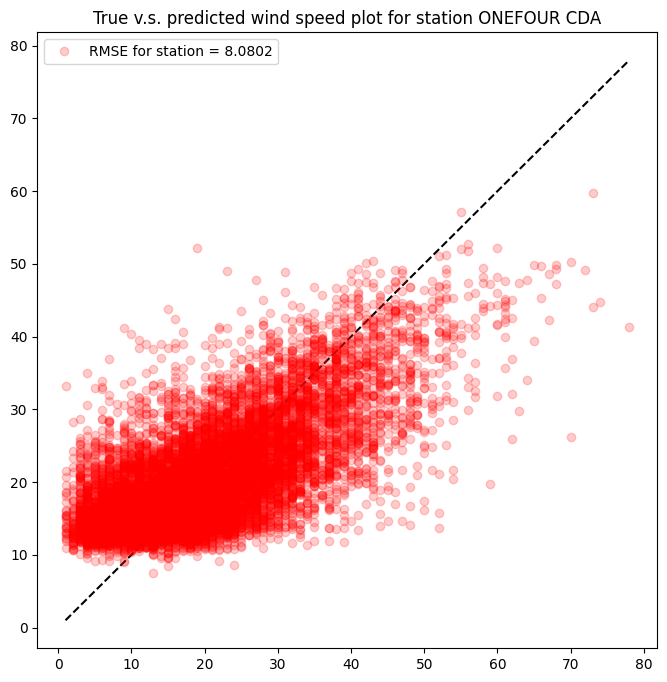

181/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 849us/step


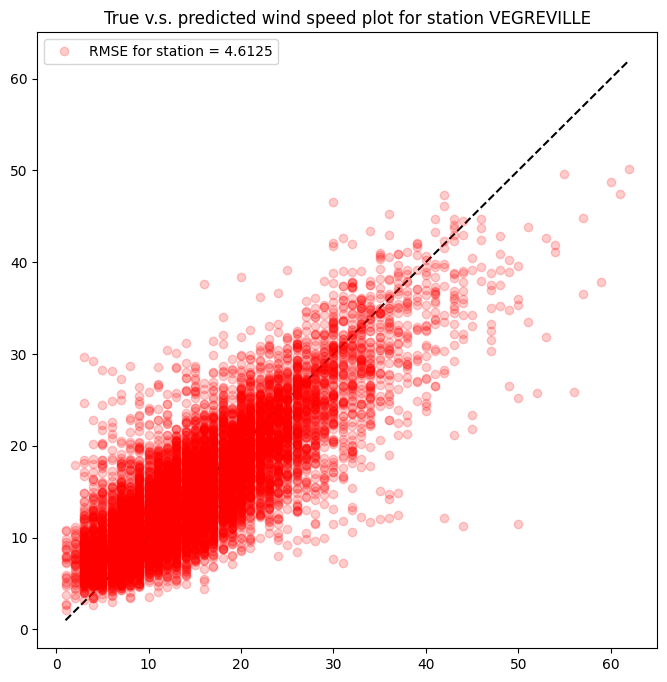

209/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 687us/step


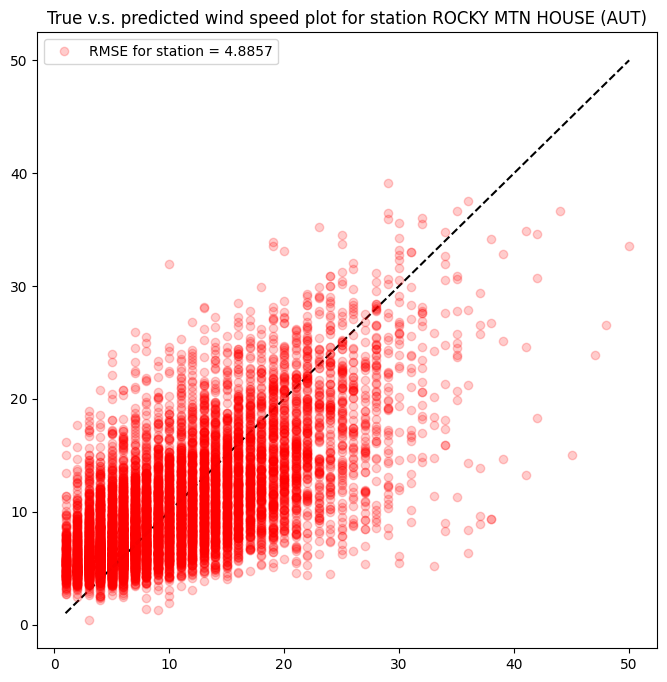

203/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 663us/step


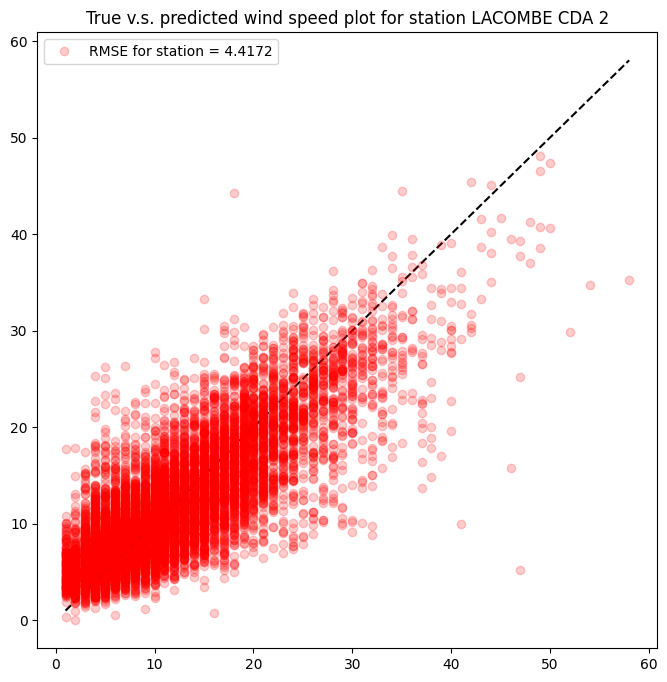

239/358 [===================>..........] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 605us/step


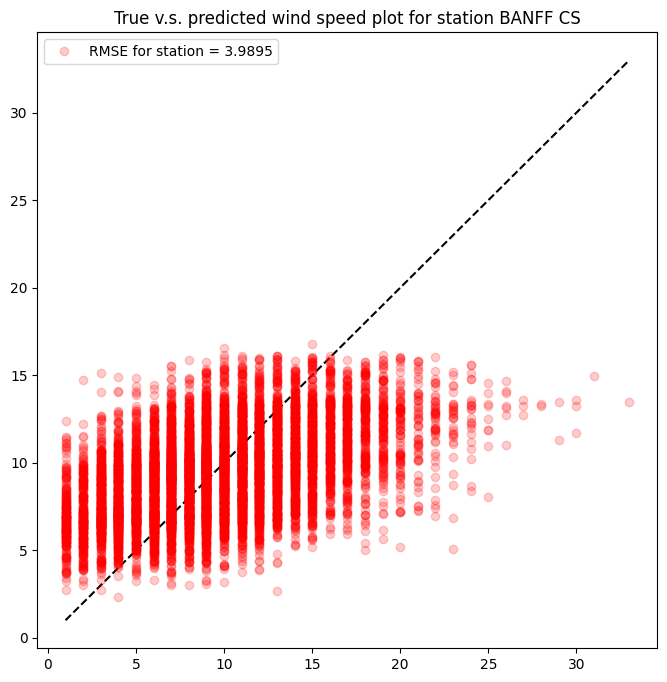

193/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 791us/step


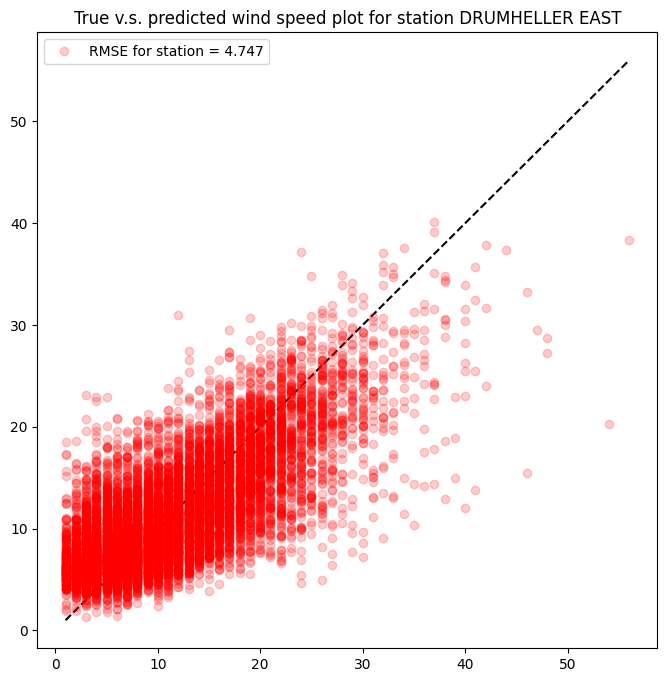

199/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 736us/step


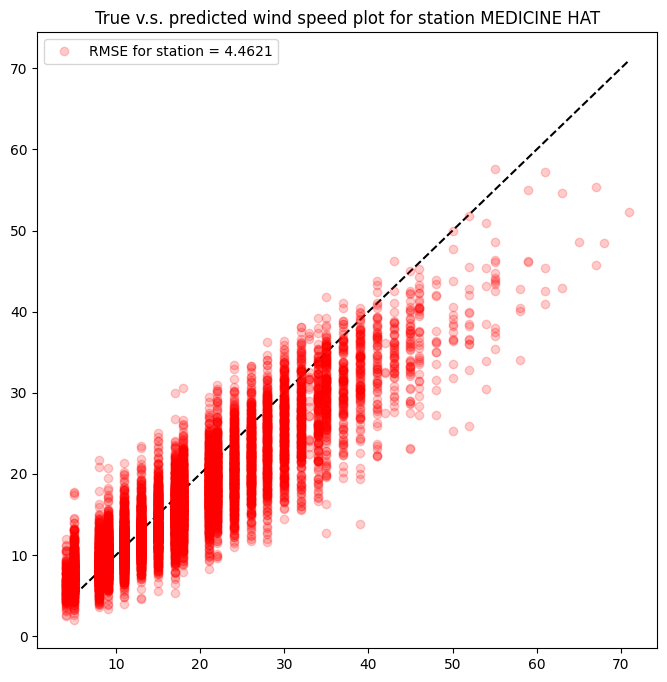

192/358 [===============>..............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 804us/step


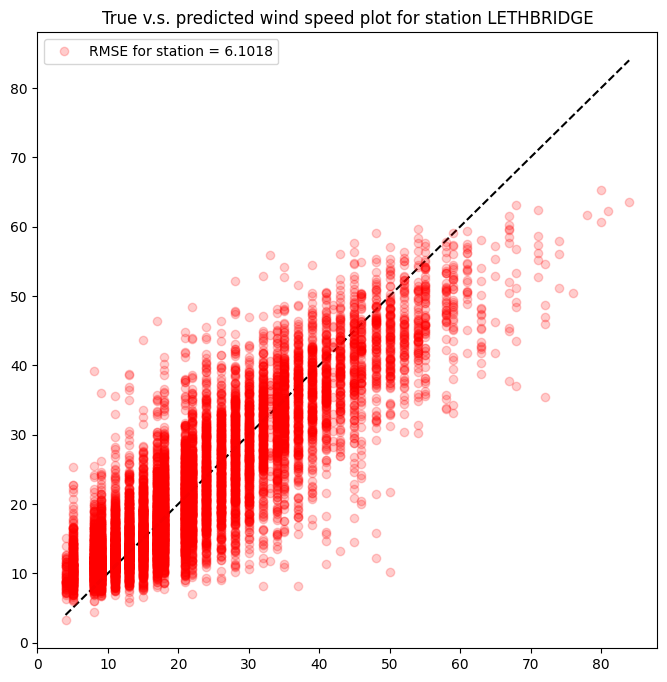

209/358 [================>.............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 662us/step


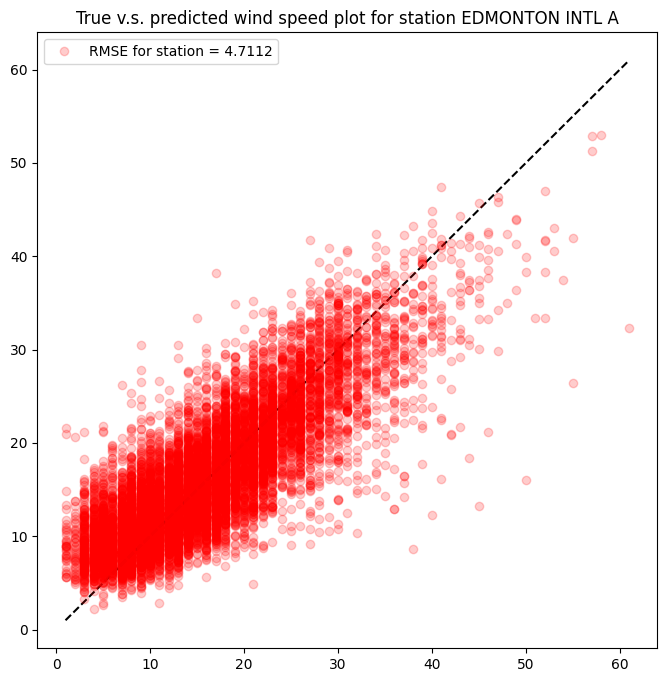

190/358 [==============>...............] - ETA: 0s

E:\Users\PPL\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


358/358 [==============================] - 0s 759us/step


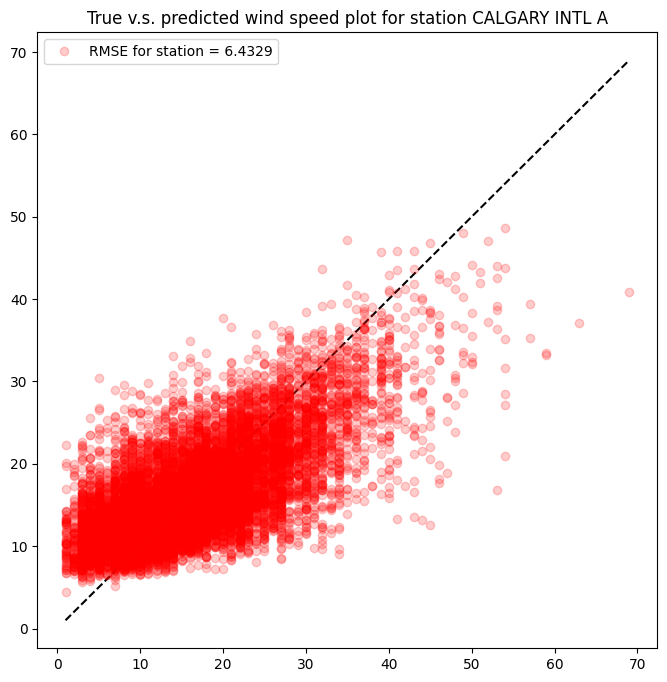

In [ ]:
# plots for testing data
prediction_per_stations = []
test_x = []
test_y = []

for station in stations_to_test:
    features, target = Data_utils.generate_data(
        test_data, 
        station, 
        9, 
        100000, 
        0
    )
    x = np.array(features)
    x = scaler.transform(x)
    y = np.array(target)
    
    test_x.append(x)
    test_y.append(y)
    prediction = np.array(neural_network_model.predict(x)).flatten()
    
    plot_prediction_error(y, prediction, station)
    
    prediction_per_stations.append({station : prediction})

In [ ]:
test_x = np.array(test_x)
test_x = test_x.reshape(-1, test_x.shape[-1])
test_y = np.array(test_y)
test_y = test_y.flatten()

In [ ]:
predict_test = neural_network_model.evaluate(test_x, test_y)

7157/7157 [==============================] - 7s 988us/step - loss: 29.0921 - root_mean_squared_error: 5.3937


In [ ]:
predict_test = neural_network_model.predict(test_x)
r2 = r2_score(test_y, predict_test)
print(r2)

7157/7157 [==============================] - 4s 514us/step
0.6664769249040547
